## Machine Learning Assignment

<b> Authors </b>
<br>Amanda Tavares - up202103516
<br>Arina Sanches - up202100371
<br>Lirielly Nascimento - up202100370
<br>Rita Cardoso - up202110019

# **Introdução**

Uma tarefa de Machine Learning pode ser abordada usando diferentes suposições, o que leva ao uso de diferentes métodos, que podem ser implementados de diferentes maneiras, usando uma ampla variedade de hiperparâmetros.

Foi solicitado que o grupo considerasse diferentes combinações de modelos e gerasse conjuntos de dados artificiais em que um dos modelos tivesse uma performance significativamente melhor que o outro. Para a realização desta tarefa foi necessário compreender as vantagens e desvantagens gerais de diferentes métodos, além de de utilizar as suposições do metodo de classificação a favor ou contra ele.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon

import warnings
warnings.filterwarnings("ignore")

#boundar
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

### **Funções para geração dos modelos**

De forma a organizar e centralizar os códigos geradores dos modelos, foram criadas as funções GA, GB e get_models, que estão abaixo definidas. Para cada um dos pares de modelos, a função GA gera um conjunto de dados sintético em que o modelo A tem um desempenho significativamente melhor que o modelo B. Em contrapartida a função GB gera um dataset em que o modelo B tem um resultado significativamente melhor. Na função get_models são definidos os parâmetros e hiperparâmetros utilizados por cada um dos modelos em estudo.



In [ ]:
from sklearn import preprocessing
custom_cmap_counter = ListedColormap(['#7FFFD4', '#FFD700', '#E6E6FA', '#000080', '#DC143C'])
custom_cmap_points = ListedColormap(['#04D8B2', '#FFFF00', '#C79FEF', '#01153E', '#8C000F'])

##Function that gives better A than B
def GA(idx):
  print("GA {}".format(idx+1))
  if idx == 0: # Logistic Regression better than kNN
    X, y = datasets.make_classification(n_samples=1000, n_features=30, n_classes=2, n_redundant=0,
    n_clusters_per_class=1, n_informative=2, weights=[0.6, 0.4], random_state = 26)
    return X, y
  elif idx == 1: # LDA better than Decision Tree
    X,y = make_blobs(n_samples=[100000,100000], centers=[(3,5),(6,5)], n_features=15, cluster_std=[2,2],
    shuffle=False)
    return X, y
  elif idx == 2: # LDA better than QDA
    X, y = datasets.make_classification(n_samples=2000, n_features=20, n_classes=4, n_redundant=0,
    n_clusters_per_class=1, weights = [0.25,0.25,0.25,0.25], class_sep=2, flip_y=0.4, random_state=12)
    return X, y
  elif idx == 3: # Logistic Regression better than LDA
    X,y = datasets.make_classification(n_samples=2000, n_features=4, n_classes=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.8, 0.2], class_sep=0.6, flip_y=0.05, random_state=12)
    return X, y
  elif idx == 4: # kNN better than Decision Tree
    X,y = datasets.make_classification(n_samples=1000, n_features=5, n_classes=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.7, 0.3], random_state = 16)
    return X, y
  elif idx == 5: # Decision Tree better than Tree Boosting
    X, y = datasets.make_classification(n_samples=250, n_features=20, n_informative=20, n_redundant=0, n_classes=2, 
    n_clusters_per_class=1,flip_y = 0.5, class_sep= 0.1,random_state=1)
    return X, y
  elif idx == 6: # SVM Radial better than SVM Linear
    X, y  = make_circles(n_samples=1000, noise=0.05)
    return X, y
  elif idx == 7: # SVM Radial better than SVM Polynomial
    X, y = make_circles(1000, factor=0.6, noise=.1)
    return X, y
  elif idx == 8: # MLP better than Logistic Regression
    X, y = make_circles(1000, factor=0.6, noise=.1, random_state = 52)
    return X, y
  elif idx == 9: # MLP Relu better than kNN
    X, y = datasets.make_circles(1000, factor=0.7, noise=.35, random_state=45)
    return X, y
  elif idx == 10: # MLP Relu better than MLP Sigmoid
    X, y = datasets.make_circles(1000, factor=0.5, noise=.35, random_state=45)
    return X, y

def GB(idx):
  print("GB {}".format(idx+1))
  if idx == 0: # kNN better than Logistic Regression
    X, y = make_blobs(n_samples=[700,200], centers=[(3,5),(3,5)], n_features=2, cluster_std=[0.8,1.5],
    shuffle=False, random_state = 20)
    return X, y
  elif idx == 1: # Decision Tree better than LDA
    X, y = make_circles(n_samples=1000, noise=0.05)
    return X, y
  elif idx == 2: # QDA better than LDA
    X, y = make_blobs(n_samples=[200,200], centers=[(3,5),(6,5)], n_features=3, cluster_std=[1,4],
    shuffle=False, random_state = 16)
    return X, y
  elif idx == 3: # LDA better than Logistic Regression (FALTA)
    X, y = datasets.make_classification(n_samples=2000, n_features=10, n_classes=3, n_redundant=0,
    n_clusters_per_class=1, weights = [0.4,0.4,0.2], class_sep=2, flip_y=0.4, random_state=12)
    return X, y
  elif idx == 4: # Decision Tree better than KNN
    X, y = datasets.make_classification(n_samples=1000, n_features=25, n_classes=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.7, 0.3], class_sep=3, flip_y=1.5, random_state = 16)
    return X, y
  elif idx == 5: # Tree Boosting better than Decision Tree
    X, y = datasets.make_classification(n_samples=1000, n_features=20, n_classes=5,
    n_informative=20, n_redundant=0, shuffle=False, random_state=33)
    return X, y
  elif idx == 6: # SVM linear better than SVM Radial
    X, y = datasets.make_classification(n_samples=500, n_features=25, n_classes=3, n_redundant=0, n_informative=6,
                                   n_clusters_per_class=1, weights = [0.5,0.3,0],
                                   class_sep=2, flip_y=0.4, random_state=12)
    return X, y
  elif idx == 7: # SVM Polynomial better than SVM Radial
    X, y = make_blobs(n_samples=1000, n_features=10, centers=2, cluster_std=40, random_state=85)
    return X, y
  elif idx == 8: # Logistic Regression better than MLP
    X, y = datasets.make_classification(n_samples=150, n_features=6, n_classes=2, n_redundant=0, 
    n_clusters_per_class=1, random_state=42, weights=[0.9, 0.1])
    return X, y
  elif idx == 9: # kNN better than MLP
    X, y = datasets.make_moons(1500, noise=0.9)
    return X, y
  elif idx == 10: # MLP Sigmoid better than MLP Relu
    X, y = datasets.make_classification(n_samples=150, n_features=6, n_classes=2, n_redundant=0, 
    n_clusters_per_class=1, random_state=42, weights=[0.9, 0.1])
    return X, y

def get_models():
  models = []
  models.append(("1_Logistic_Regression", LogisticRegression(), 
                 "1_K-Nearest_Neighbour", KNeighborsClassifier()))
  models.append(("2_LDA", LinearDiscriminantAnalysis(), 
                 "2_Decision_Tree", DecisionTreeClassifier()))
  models.append(("3_LDA", LinearDiscriminantAnalysis(), 
                 "3_QDA", QuadraticDiscriminantAnalysis()))
  models.append(("4_Logistic_Regression", LogisticRegression(), 
                 "4_LDA", LinearDiscriminantAnalysis()))
  models.append(("5_K-Nearest_Neighbour", KNeighborsClassifier(n_neighbors=10), 
                 "5_Decision_Tree", DecisionTreeClassifier(criterion='entropy')))
  models.append(("6_Decision_Tree", DecisionTreeClassifier(criterion='entropy'), 
                 "6_Tree_Boosting", AdaBoostClassifier(n_estimators=100)))
  models.append(("7_SVM_Radial", SVC(kernel='rbf', C=10, probability=True), 
                 "7_SVM_Linear", SVC(kernel='linear', C=10, probability=True)))
  models.append(("8_SVM_Radial", SVC(kernel='rbf', C=10, probability=True), 
                 "8_SVM_Polynomial", SVC(kernel='poly', C=10, probability=True)))
  models.append(("9_MLP", MLPClassifier(max_iter=10000), 
                 "9_Logistic_Regression", LogisticRegression()))
  models.append(("10_MLP", MLPClassifier(hidden_layer_sizes=(100,), 
                                         max_iter=10000, activation='relu', 
                                         learning_rate_init=0.1), 
                 "10_K-Nearest_Neighbour", KNeighborsClassifier(n_neighbors=1)))
  models.append(("11_MLP_Relu", MLPClassifier(hidden_layer_sizes=(100,), 
                                         max_iter=10000, activation='relu', 
                                         learning_rate_init=0.1), 
                 "11_MLP_Sigmoid", MLPClassifier(hidden_layer_sizes=(100,), 
                                                 max_iter=10000, 
                                                 activation='logistic')))
  return models

A função abaixo definida, é utilizada para definir as visualizações dos conjuntos de dados gerados e as fronteiras de decisão definidas pelos modelos. O TSNE foi utilizado a fim de permitir a visualização de conjuntos de dados com mais de duas variáveis explicativas.

In [ ]:
def plot(n1, m1, n2, m2, X, y):
    ##colours
    custom_cmap_counter = ListedColormap(['#7FFFD4','#FFD700' ,'#E6E6FA', '#000080', '#DC143C' ])
    custom_cmap_points = ListedColormap(['#04D8B2','#FFFF00' ,'#C79FEF', '#01153E', '#8C000F'])
    
    z = TSNE(n_components=2,init='random', random_state = 32).fit_transform(X)

    x0, x1 = np.meshgrid(np.linspace(z[:, 0].min(), z[:, 0].max(), 500).reshape(-1, 1), 
                         np.linspace(z[:, 1].min(), z[:, 1].max(), 500).reshape(-1, 1))

    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = m1.fit(z,y).predict(X_new)
    zz = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, zz, cmap=custom_cmap_counter)
    plt.scatter(z[:,0], z[:, 1], c=y, cmap=custom_cmap_points)
    plt.title(n1)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.tight_layout()
    plt.show()

    y_pred = m2.fit(z,y).predict(X_new)
    zz = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, zz, cmap=custom_cmap_counter)
    plt.scatter(z[:,0], z[:, 1], c=y, cmap=custom_cmap_points)
    plt.title(n2)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.tight_layout()
    plt.show()

Para determinar se dado modelo realmente tende a alcançar um resultado significativamente melhor que um outro em estudo, foi utilizado o teste de Wilcoxon.
Com este teste é possivel verificar a significância estatística dos resultados obtidos, foram utilizadas as seguintes hipóteses:
 

*   H0:  AUCa = AUCb
*   H1:  AUCa ≠ AUCb

Se o valor p-value for menor que 0.05, a hipótese nula é rejeitada com um nível de significância de 0.05 e conclui-se que os AUCs são diferentes.

A função abaixo gera os modelos para os diferentes pares em estudo e realiza o teste estatistico acima descrito para os mesmo.


In [ ]:
def pair(ind, df_results):
    # get the list of models to consider
    models = get_models()
    # collect results for the 10 rum of each iteration
    results_m1, results_m2 = list(), list()
    # function list
    func = ["GA", "GB"]

    n1 = models[ind][0]
    m1 = models[ind][1]
    n2 = models[ind][2]
    m2 = models[ind][3]

    for f in func:
    # get the data from GA or GB
      if f == "GA": 
        X, y = GA(ind)  
      else:
        X, y = GB(ind)

      if ind == 2 and f == "GA":
        # evaluate model using each test condition
        myscore = make_scorer(roc_auc_score, multi_class='ovo', needs_proba=True)
        values_roc_auc_m1 = cross_val_score(m1.fit(X, y), X, y, scoring= myscore, cv = 10)
        mean_roc_auc_m1 = values_roc_auc_m1.mean()
        std_roc_auc_m1 = values_roc_auc_m1.std()
        print('roc_auc score for {} :  {:.3f} +/- {:.3f}'.format(n1, mean_roc_auc_m1, std_roc_auc_m1))

        values_roc_auc_m2 = cross_val_score(m2.fit(X, y), X, y, scoring= myscore, cv = 10)
        mean_roc_auc_m2 = values_roc_auc_m2.mean()
        std_roc_auc_m2 = values_roc_auc_m2.std()
        print('roc_auc score for {} :  {:.3f} +/- {:.3f}'.format(n2, mean_roc_auc_m2, std_roc_auc_m2))

      elif ind == 3 and f == "GB":
        # evaluate model using each test condition
        myscore = make_scorer(roc_auc_score, multi_class='ovo', needs_proba=True)
        values_roc_auc_m1 = cross_val_score(m1.fit(X, y), X, y, scoring= myscore, cv = 10)
        mean_roc_auc_m1 = values_roc_auc_m1.mean()
        std_roc_auc_m1 = values_roc_auc_m1.std()
        print('roc_auc score for {} :  {:.3f} +/- {:.3f}'.format(n1, mean_roc_auc_m1, std_roc_auc_m1))

        values_roc_auc_m2 = cross_val_score(m2.fit(X, y), X, y, scoring= myscore, cv = 10)
        mean_roc_auc_m2 = values_roc_auc_m2.mean()
        std_roc_auc_m2 = values_roc_auc_m2.std()
        print('roc_auc score for {} :  {:.3f} +/- {:.3f}'.format(n2, mean_roc_auc_m2, std_roc_auc_m2))

      elif ind == 5 and f == "GB":
        # evaluate model using each test condition
        myscore = make_scorer(roc_auc_score, multi_class='ovo', needs_proba=True)
        values_roc_auc_m1 = cross_val_score(m1.fit(X, y), X, y, scoring= myscore, cv = 10)
        mean_roc_auc_m1 = values_roc_auc_m1.mean()
        std_roc_auc_m1 = values_roc_auc_m1.std()
        print('roc_auc score for {} :  {:.3f} +/- {:.3f}'.format(n1, mean_roc_auc_m1, std_roc_auc_m1))

        values_roc_auc_m2 = cross_val_score(m2.fit(X, y), X, y, scoring= myscore, cv = 10)
        mean_roc_auc_m2 = values_roc_auc_m2.mean()
        std_roc_auc_m2 = values_roc_auc_m2.std()
        print('roc_auc score for {} :  {:.3f} +/- {:.3f}'.format(n2, mean_roc_auc_m2, std_roc_auc_m2))

      elif ind == 6 and f == "GB":
        # evaluate model using each test condition
        myscore = make_scorer(roc_auc_score, multi_class='ovo', needs_proba=True)
        values_roc_auc_m1 = cross_val_score(m1.fit(X, y), X, y, scoring= myscore, cv = 10)
        mean_roc_auc_m1 = values_roc_auc_m1.mean()
        std_roc_auc_m1 = values_roc_auc_m1.std()
        print('roc_auc score for {} :  {:.3f} +/- {:.3f}'.format(n1, mean_roc_auc_m1, std_roc_auc_m1))

        values_roc_auc_m2 = cross_val_score(m2.fit(X, y), X, y, scoring= myscore, cv = 10)
        mean_roc_auc_m2 = values_roc_auc_m2.mean()
        std_roc_auc_m2 = values_roc_auc_m2.std()
        print('roc_auc score for {} :  {:.3f} +/- {:.3f}'.format(n2, mean_roc_auc_m2, std_roc_auc_m2))

      else:
        # evaluate model using each test condition
        values_roc_auc_m1 = cross_val_score(m1, X, y, scoring="roc_auc", cv = 10)
        mean_roc_auc_m1 = values_roc_auc_m1.mean()
        std_roc_auc_m1 = values_roc_auc_m1.std()
        print('roc_auc score for {} :  {:.3f} +/- {:.3f}'.format(n1, mean_roc_auc_m1, std_roc_auc_m1))

        values_roc_auc_m2 = cross_val_score(m2, X, y, scoring="roc_auc", cv = 10)
        mean_roc_auc_m2 = values_roc_auc_m2.mean()
        std_roc_auc_m2 = values_roc_auc_m2.std()
        print('roc_auc score for {} :  {:.3f} +/- {:.3f}'.format(n2, mean_roc_auc_m2, std_roc_auc_m2))
      
      stat, pt = ttest_rel(values_roc_auc_m1, values_roc_auc_m2)
      if f == "GA":
        print('ttest: stat={:.3f}, p-value ({} , {})={:.3f}'.format(stat, n1, n2, pt))
      else:
        print('ttest: stat={:.3f}, p-value ({} , {})={:.3f}'.format(stat, n2, n1, pt))

      stat, pw = wilcoxon(values_roc_auc_m1, values_roc_auc_m2)
      if f == "GA":
        print('wilcoxon: stat={:.3f}, p-value ({} , {})={:.3f}'.format(stat, n1, n2, pw))
      else:
        print('wilcoxon: stat={:.3f}, p-value ({} , {})={:.3f}'.format(stat, n2, n1, pw))
        print('\n')

      #PLOT
      plot(n1, m1, n2, m2, X, y)

    # dict to save the final results
    df_results = df_results.append(dict(zip(df_results.columns,[f, n1, values_roc_auc_m1, round(pt, 4), round(pw, 4)])), ignore_index=True) 
    df_results = df_results.append(dict(zip(df_results.columns,[f, n2, values_roc_auc_m2, round(pt, 4), round(pw, 4)])), ignore_index=True)

Dataframe para armazenar os resultados obtidos entre as comparações dos pares dos modelos.


In [ ]:
df_results = pd.DataFrame(columns=["Function", "Algorithm", "Results AUC", "p-value ttest_rel", "p-value wilcoxon"])

# **Comparação entre modelos**

 Nesta secção, serão apresentados os conjuntos de dados e as fronteiras de decisão geradas, assim como uma explicação de como esses resultados terem sido alcançados. Para comprovar a significância estatística dos resultados obtidos, também serão expostos os valores médios de AUC e os valores de p-value obtidos pelo teste Wilcoxon, para cada um dos pares em estudo.

### 1. Logistic Regression and kNN

* **Logistic Regression obtendo melhor resultado - GA**

Foi gerado um conjunto de dados com um grande número de variáveis, o que não favorece o KNN. Os dados gerados também apresentam ruído, o que faz com o que os vizinhos mais próximos tenham maior probabilidade de não serem similares, não pertencerem a mesma classe, o que também piora o desempenho do KNN.Por usar as probabilidades, a regressão logística tem um melhor desempenho. Pelo teste estatístico, é possivel afirmar que a regressão logística consistentemente consegue um resultado superior ao do KNN.

* **kNN melhor obtendo melhor resultado - GB**

A regressão logística sempre vai definir uma barreira linear, por isso foi gerado um conjunto de dados que não seja linearmente separável, já o KNN consegue definir barreiras não lineares e por isso se encontra em vantagem.
O conjunto gerado não é balanceado, o desvio padrão entre os clusters é diferente, tendo um quase o dobro do outro. Os dados da mesma classe estão mais próximos um do outro com um padrão não linear, o que também favorece o kNN.

GA 1
roc_auc score for 1_Logistic_Regression :  0.979 +/- 0.010
roc_auc score for 1_K-Nearest_Neighbour :  0.933 +/- 0.029
ttest: stat=5.326, p-value (1_Logistic_Regression , 1_K-Nearest_Neighbour)=0.000
wilcoxon: stat=0.000, p-value (1_Logistic_Regression , 1_K-Nearest_Neighbour)=0.005


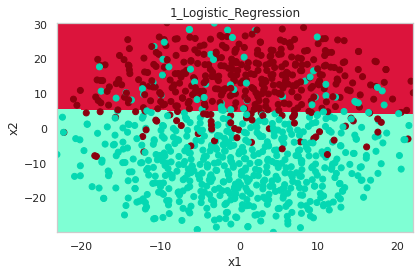

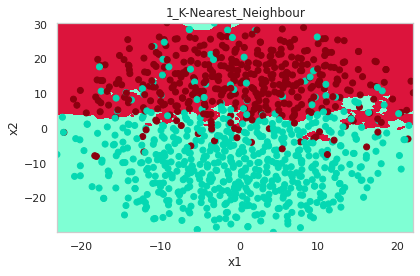

GB 1
roc_auc score for 1_Logistic_Regression :  0.392 +/- 0.084
roc_auc score for 1_K-Nearest_Neighbour :  0.739 +/- 0.055
ttest: stat=-8.207, p-value (1_K-Nearest_Neighbour , 1_Logistic_Regression)=0.000
wilcoxon: stat=0.000, p-value (1_K-Nearest_Neighbour , 1_Logistic_Regression)=0.005




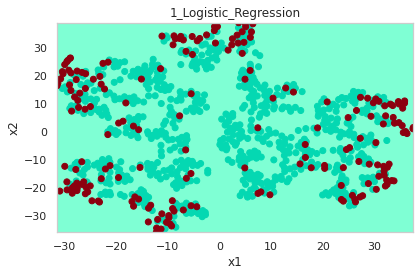

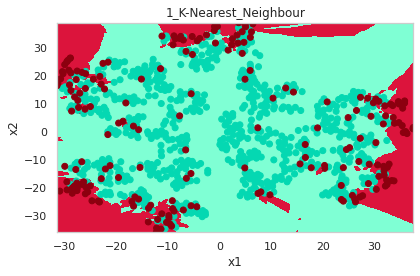

In [ ]:
pair(0, df_results)

### 2. LDA and Decision Tree

* **LDA melhor - GA**
 
O conjunto de dados segue uma distribuição normal, tem 100.000 observações, 15 variáveis. Os dados se encontram concentrados em dois clusters e com  sobreposição de dados entre os cluster. Um dos problemas das árvores de decisão é a tendência ao overfit. A árvore em estudo acaba criando fronteiras muito detalhadas para tentar acertar os dados sobrepostos e acaba perdendo poder de generalização. O LDA acaba sendo menos sensível ao ruído, cria uma fronteira linear, consegue generalizar melhor neste cenário e obter um melhor resultado.

* **Decision Tree - GB**

Foi gerado um dataset circular com 1.000 amostras, neste cenário a árvore de decisão tem um desempenho melhor que o LDA, pois diferente do LDA que traça uma fronteira linear, ele consegue criar fronteiras não lineares e se adatar melhor a distribuição dos dados.

GA 2
roc_auc score for 2_LDA :  0.854 +/- 0.002
roc_auc score for 2_Decision_Tree :  0.687 +/- 0.003
ttest: stat=128.607, p-value (2_LDA , 2_Decision_Tree)=0.000
wilcoxon: stat=0.000, p-value (2_LDA , 2_Decision_Tree)=0.005


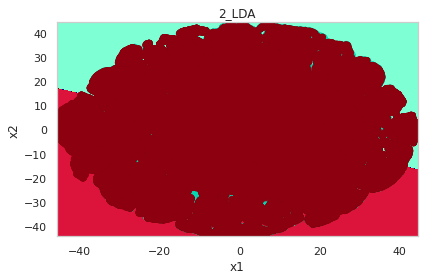

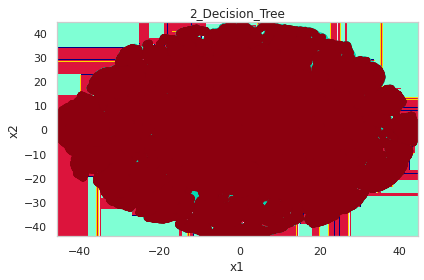

GB 2
roc_auc score for 2_LDA :  0.429 +/- 0.027
roc_auc score for 2_Decision_Tree :  0.945 +/- 0.010
ttest: stat=-49.578, p-value (2_Decision_Tree , 2_LDA)=0.000
wilcoxon: stat=0.000, p-value (2_Decision_Tree , 2_LDA)=0.005




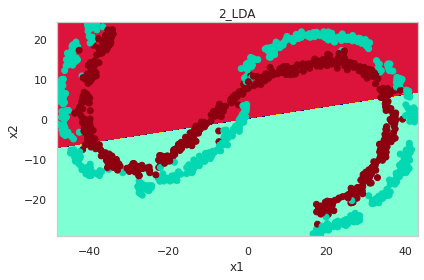

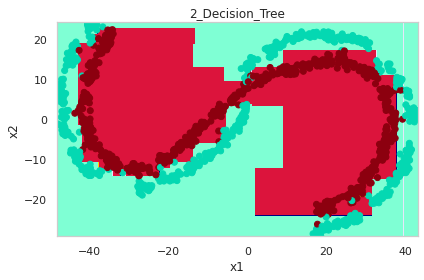

In [ ]:
pair(1, df_results)

### 3. LDA and QDA

* **Linear Discriminant Analysis melhor - GA**

O conjunto de dados gerado possui muitas observações, com muitas features e 4 classes balanceadas, e apresenta ruído. O LDA tem um desempenho ligeiramente melhor que o QDA neste conjunto de dados e pelo teste do Wilcoxon conclui-se que os resultados são estatisticamente significativos.

* **Quadratic Discriminant Analysis melhor -GB**

O conjunto de dados gerado tem dados não lineares e com desvio padrão diferente, o LDA cria uma fronteira linear e considera que as covariâncias são iguais, portanto não consegue se adaptar bem aos dados, enquanto o QDA gera uma função quadrática e consegue se adaptar. 


GA 3
roc_auc score for 3_LDA :  0.797 +/- 0.027
roc_auc score for 3_QDA :  0.778 +/- 0.025
ttest: stat=9.158, p-value (3_LDA , 3_QDA)=0.000
wilcoxon: stat=0.000, p-value (3_LDA , 3_QDA)=0.005


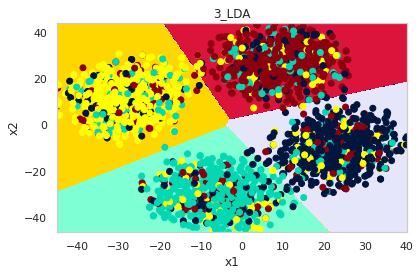

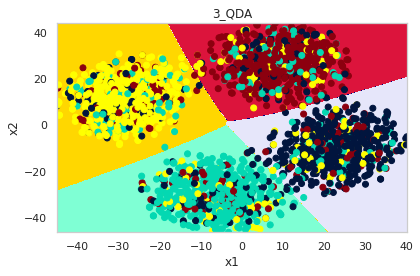

GB 3
roc_auc score for 3_LDA :  0.795 +/- 0.089
roc_auc score for 3_QDA :  0.954 +/- 0.028
ttest: stat=-4.713, p-value (3_QDA , 3_LDA)=0.001
wilcoxon: stat=0.000, p-value (3_QDA , 3_LDA)=0.005




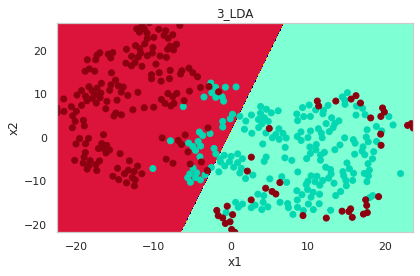

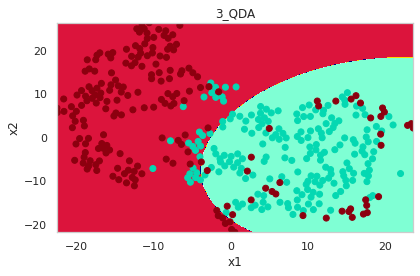

In [ ]:
pair(2, df_results)

### 4. Logistic Regression and LDA

* **Logistic Regression melhor - GA**

Para este par, foi criado um conjunto de dados em que uma das váriveis segue uma distribuição qui quadrado, de forma a contrariar a suposição de normalidade feita pelo LDA e assim piorar o desempenho deste modelo.

* **LDA melhor - GB**

O conjunto de dados gerado segue a distribuição normal e a variável target possui três classes, o que prejudica a Regressão Logística, que foi tradicionalmente formulada para ser uma classificação binária.

</br> 
Nos dois casos considerados acima, os classificadores têm desempenho muito similar, pois os dois tentam definir fronteiras lineares. Porém, estatisticamente ficou prova que em cada uma das situações um dos classificadores tem consistentemente um resultado ligeiramente melhor. 

GA 4
roc_auc score for 4_Logistic_Regression :  0.900 +/- 0.023
roc_auc score for 4_LDA :  0.899 +/- 0.023
ttest: stat=2.721, p-value (4_Logistic_Regression , 4_LDA)=0.024
wilcoxon: stat=5.000, p-value (4_Logistic_Regression , 4_LDA)=0.022


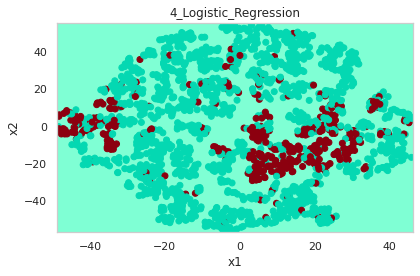

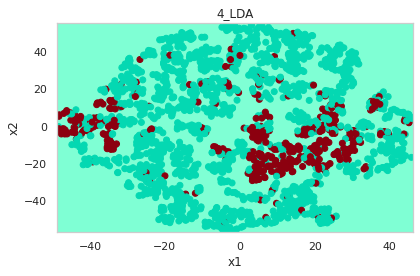

GB 4
roc_auc score for 4_Logistic_Regression :  0.786 +/- 0.031
roc_auc score for 4_LDA :  0.790 +/- 0.030
ttest: stat=-5.062, p-value (4_LDA , 4_Logistic_Regression)=0.001
wilcoxon: stat=1.000, p-value (4_LDA , 4_Logistic_Regression)=0.007




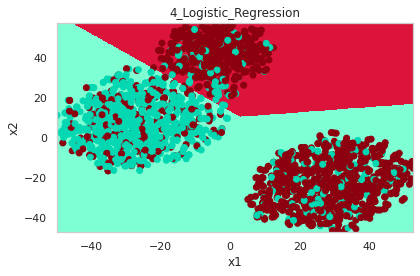

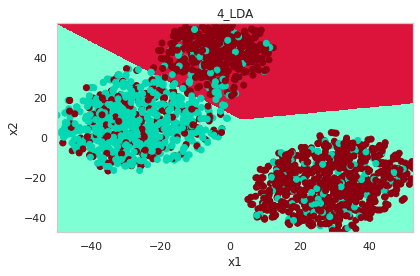

In [ ]:
pair(3, df_results)

### 5. Nearest Neighbour and Decision Tree

* **Nearest Neighbour melhor - GA**

Os dados gerados possuem ruído, a árvore de decisão definiu fronteiras muito detalhadas, sobreajustou-se aos dados. Já o KNN, definiu fronteiras não tão detalhadas e assim consegue generalizar melhor. Vale também ressaltar que apesar dos dados possuírem ruído, eles não são esparsos e os vizinhos são similares, o que favorece o KNN uma vez que ele é baseado em distâncias.

* **Decision Tree melhor - GB**

O dataset gerado tem muitas variáveis, também apresenta ruído, mas diferentemente do conjunto de dados considerado anteriormente, existem muitos vizinhos próximos que não são da mesma classe (não são similares), tudo isso piora o desempenho do KNN. A árvore de decisão também tem problemas para se adaptar a esses dados, mas consegue fazer uma melhor aproximação que o KNN.

GA 5
roc_auc score for 5_K-Nearest_Neighbour :  0.946 +/- 0.019
roc_auc score for 5_Decision_Tree :  0.856 +/- 0.036
ttest: stat=10.905, p-value (5_K-Nearest_Neighbour , 5_Decision_Tree)=0.000
wilcoxon: stat=0.000, p-value (5_K-Nearest_Neighbour , 5_Decision_Tree)=0.005


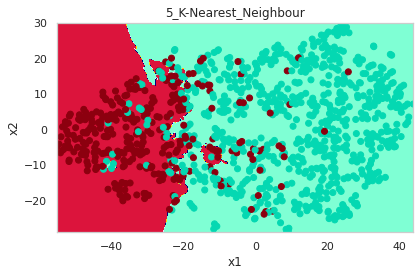

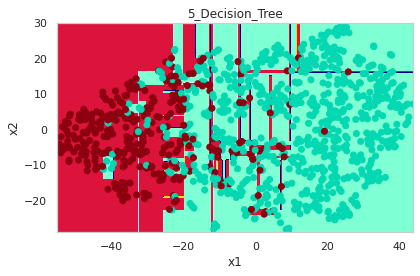

GB 5
roc_auc score for 5_K-Nearest_Neighbour :  0.466 +/- 0.056
roc_auc score for 5_Decision_Tree :  0.526 +/- 0.050
ttest: stat=-2.251, p-value (5_Decision_Tree , 5_K-Nearest_Neighbour)=0.051
wilcoxon: stat=9.000, p-value (5_Decision_Tree , 5_K-Nearest_Neighbour)=0.059




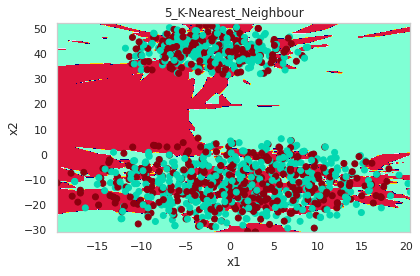

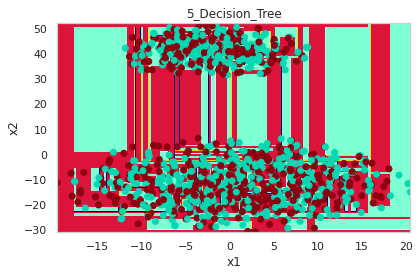

In [ ]:
pair(4, df_results)

### 6. Decision Tree and Tree Boosting 

* **Tree Boosting melhor - GA**

Os resultados da árvore de decisão tendem a piorar em problemas de classificação multiclasse. Em razão disso foi criado um conjunto de dados, com 5 classes na variavel target, mil observações e 20 features. Por ser um ensemble, o Ada Boosting consegue melhor resultados que uma única árvore de decisão, neste cenário. 

* **Decision Tree melhor - GB**

O conjunto de dados gerado possui um número reduzido de observações, muitas features, duas classes na variável dependente e foi introduzido ruído. Nestas condições a Ada Boosting, que é um ensemble que tende naturalmente para o overfit, acaba por obter um resultado pior que a árvore de decisão. 
 


GA 6
roc_auc score for 6_Decision_Tree :  0.584 +/- 0.133
roc_auc score for 6_Tree_Boosting :  0.427 +/- 0.084
ttest: stat=3.765, p-value (6_Decision_Tree , 6_Tree_Boosting)=0.004
wilcoxon: stat=3.000, p-value (6_Decision_Tree , 6_Tree_Boosting)=0.013


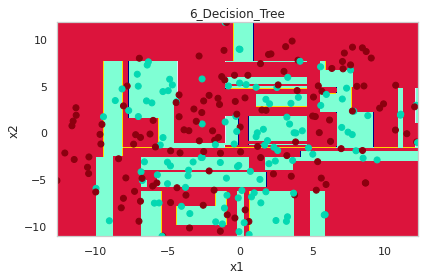

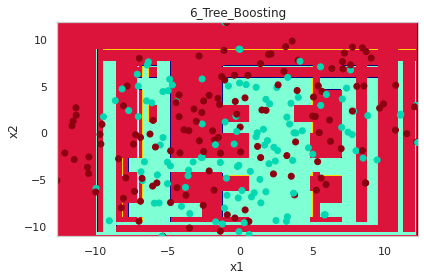

GB 6
roc_auc score for 6_Decision_Tree :  0.615 +/- 0.038
roc_auc score for 6_Tree_Boosting :  0.749 +/- 0.025
ttest: stat=-8.952, p-value (6_Tree_Boosting , 6_Decision_Tree)=0.000
wilcoxon: stat=0.000, p-value (6_Tree_Boosting , 6_Decision_Tree)=0.005




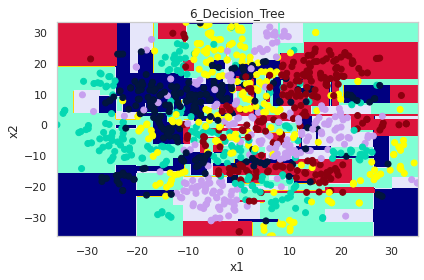

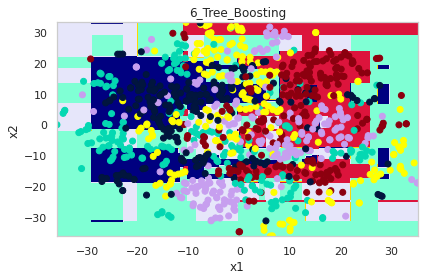

In [ ]:
pair(5, df_results)

### 7. SVM Radial and SVM Linear

* **SVM radial basis melhor -GA**

O kernel linear não se adapta bem aos dados quando estes não são linearmente separáveis. Por outro lado, o kernel radial consegue se adaptar bem a dados não lineares, em razão disso foi gerado um conjunto de dados com círculos concêntricos, beneficiando assim o SVM radial.

* **SVM linear kernel melhor -GB**

O conjunto de dados gerado possui 3 classes na variável dependente e propositalmente foram adicionadas um grande número de features (25), ruído e dados não balanceados. No gráfico apresentado para ilustrar as fronteiras geradas pelos dois modelo, podemos ver que os dados possuem maioritariamente dados da classe 1 e da classe 2 (representados pelas cores verde e lilás) e possui algumas observações da classe 3 (representada em vermelho). Os dados da 1 estão maioritariamente concentrados no canto superior direiro e os da classe 2 no canto inferior direito e os dados da classe 3 encontram-se espalhados pelos dois clusters. O radial tende a encontrar fronteiras mais flexíveis, mas nesta situação não compensa pois a classe 3 não é facilmente separável. O kernel linear que fez fronteiras mais simples e com isso conseguiu acertar mais das classes maioritárias. 


GA 7
roc_auc score for 7_SVM_Radial :  0.997 +/- 0.002
roc_auc score for 7_SVM_Linear :  0.447 +/- 0.034
ttest: stat=48.424, p-value (7_SVM_Radial , 7_SVM_Linear)=0.000
wilcoxon: stat=0.000, p-value (7_SVM_Radial , 7_SVM_Linear)=0.005


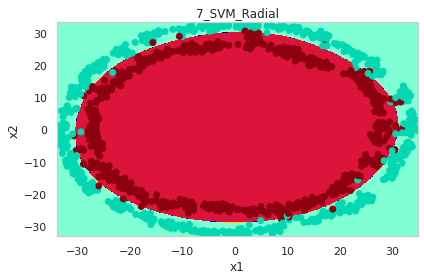

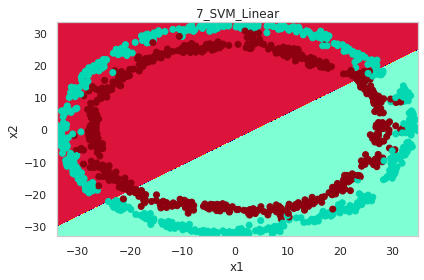

GB 7
roc_auc score for 7_SVM_Radial :  0.638 +/- 0.055
roc_auc score for 7_SVM_Linear :  0.682 +/- 0.047
ttest: stat=-3.362, p-value (7_SVM_Linear , 7_SVM_Radial)=0.008
wilcoxon: stat=6.000, p-value (7_SVM_Linear , 7_SVM_Radial)=0.028




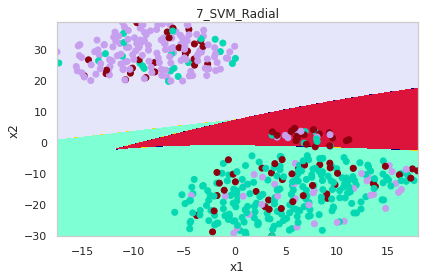

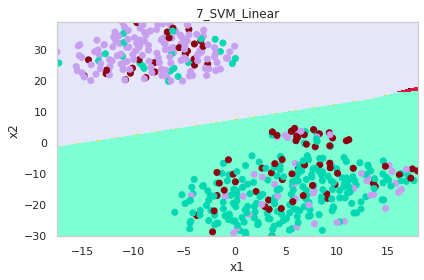

In [ ]:
pair(6, df_results)

### 8. SVM Radial and SVM Polynomial

* **SVM radial melhor - GA**

O kernel radial, consegue se adaptar melhor que o kernel polynomial, à dados com círculos concêntricos, por isso foi gerado um conjunto de dados com esta característica.

* **SVM polinomial melhor - GB**

Foi gerado um conjunto de dados, com dados circulares, 1000 observações, 10 features, com dois centros e alto desvio padrão nos clusters, de forma a gerar ruído. Com uma amostra grande e com muito ruído, o kernel polinomial, consegue se adaptar melhor e alcançar melhores resultados.


GA 8
roc_auc score for 8_SVM_Radial :  0.998 +/- 0.002
roc_auc score for 8_SVM_Polynomial :  0.456 +/- 0.069
ttest: stat=23.524, p-value (8_SVM_Radial , 8_SVM_Polynomial)=0.000
wilcoxon: stat=0.000, p-value (8_SVM_Radial , 8_SVM_Polynomial)=0.005


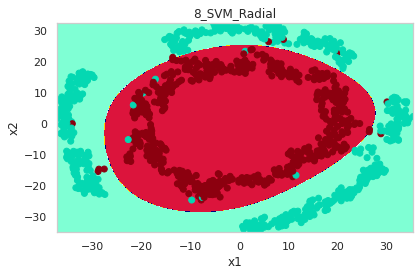

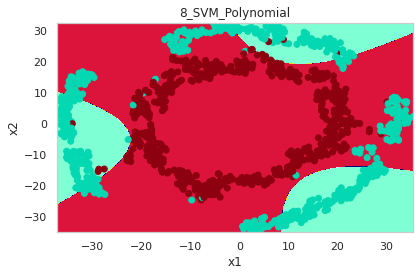

GB 8
roc_auc score for 8_SVM_Radial :  0.561 +/- 0.062
roc_auc score for 8_SVM_Polynomial :  0.613 +/- 0.025
ttest: stat=-2.677, p-value (8_SVM_Polynomial , 8_SVM_Radial)=0.025
wilcoxon: stat=2.000, p-value (8_SVM_Polynomial , 8_SVM_Radial)=0.009




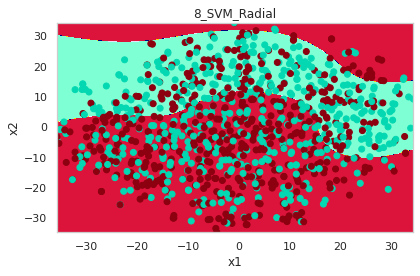

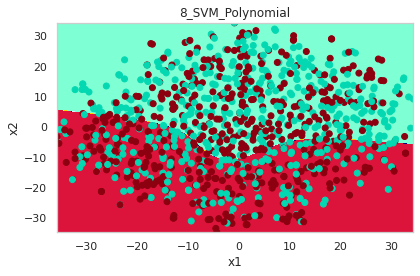

In [ ]:
pair(7, df_results)

### 9. MLP and Logistic Regression

* **MLP melhor - GA**

Os dados gerados são circulares, com ruído adicionado, o que não é favorável para a Regressão Logística que produz fronteiras lineares e não se adapta tão bem a este tipo de dados. Já o MLP, com a activation function ReLu (default do pacote utilizado), gera uma fronteira que se adapta facilmente.


* **Logistic Regression melhor - GB** 

Já este dataset foi gerado com poucas amostras, 150, sendo elas com 6 variáveis preditoras e com dados desbalanceados 90% dos dados para uma classe maioritária. Mesmo a função Relu generalizando bem, pelas características do conjunto de dados, a regressão logistica uma fronteira maior que consegue separar melhor minoritária. 


GA 9
roc_auc score for 9_MLP :  0.998 +/- 0.002
roc_auc score for 9_Logistic_Regression :  0.441 +/- 0.024
ttest: stat=70.482, p-value (9_MLP , 9_Logistic_Regression)=0.000
wilcoxon: stat=0.000, p-value (9_MLP , 9_Logistic_Regression)=0.005


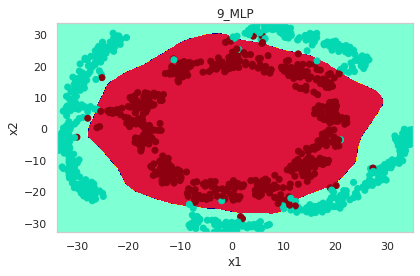

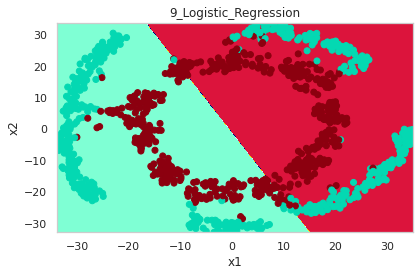

GB 9
roc_auc score for 9_MLP :  0.798 +/- 0.153
roc_auc score for 9_Logistic_Regression :  0.917 +/- 0.089
ttest: stat=-3.088, p-value (9_Logistic_Regression , 9_MLP)=0.013
wilcoxon: stat=0.000, p-value (9_Logistic_Regression , 9_MLP)=0.012




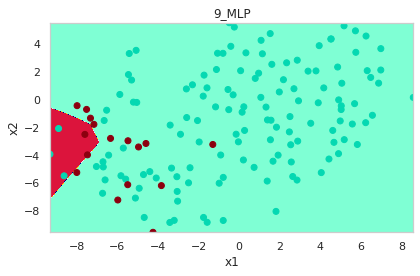

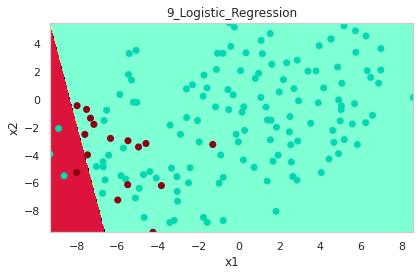

In [ ]:
pair(8, df_results)

### 10. MLP and Nearest Neighbour

* **MLP melhor - GA**

Foram gerados dados circulares com ruído, o que dificulta a classificação pelo kNN por acabar tendo muitos vizinhos com classe diferente. As caracteristicas do MLP concedem a ele uma maior capacidade de generalização e ele consegue classificar melhor os dados. 

* **Nearest Neighbour melhor - GB** 

O conjunto de dados contém muito ruído para dificultar a separação dos dados, devido a pouca quantidade de dados é difícil para o MLP conseguir estimar uma boa função e embora o ruído também não favoreça o kNN é mais fácil classificar a partir das observações mais próximas do que por uma função que não representa o modelo.


GA 10
roc_auc score for 10_MLP :  0.691 +/- 0.060
roc_auc score for 10_K-Nearest_Neighbour :  0.547 +/- 0.050
ttest: stat=5.720, p-value (10_MLP , 10_K-Nearest_Neighbour)=0.000
wilcoxon: stat=0.000, p-value (10_MLP , 10_K-Nearest_Neighbour)=0.005


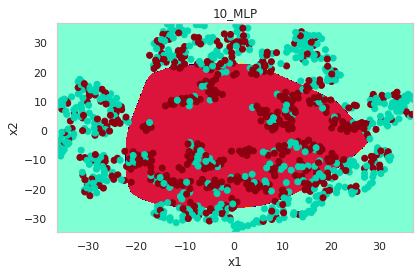

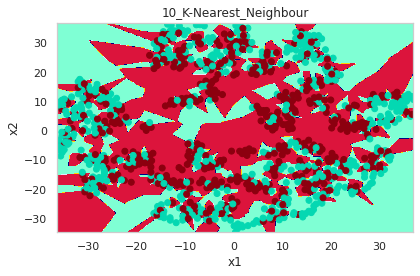

GB 10
roc_auc score for 10_MLP :  0.804 +/- 0.050
roc_auc score for 10_K-Nearest_Neighbour :  0.661 +/- 0.041
ttest: stat=9.464, p-value (10_K-Nearest_Neighbour , 10_MLP)=0.000
wilcoxon: stat=0.000, p-value (10_K-Nearest_Neighbour , 10_MLP)=0.005




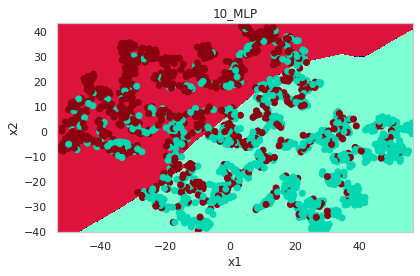

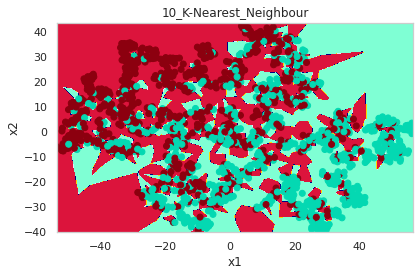

In [ ]:
pair(9, df_results)

### 11. MLP ReLu and MLP Sigmoid

* **MLP ReLu melhor - GA**

Foram gerados dados circulares, com ruído de 35% e um fator de escala de 0.8 entre os círculos. A ReLu aproxima limites não lineares já a sigmoid tem o mesmo comportamento da Regressão Logística. Desta forma a ReLu tem um desempenho melhor do que a Sigmoid nesse conjunto de dados. 

* **MLP Sigmoid - GB**

Já este dataset foi gerado com poucas amostras, 150, sendo elas com 6 variáveis preditoras e com dados desbalanceados 90% dos dados para uma classe majoritária. Embora a função ReLu seja melhor do que a Sigmoid para a grande maioria dos dados, o que dificultou bastante encontramos um dataset que contivesse características para validar a hipótese contrária (Sigmoid melhor do que a ReLu), devido aos vários benefícios que a ReLu tem, por exemplo, esparsidade, é simples de entender, tem uma probabilidade reduzida de gradiente de fuga e é computacionalmente menos custosa, a ReLu não lida bem com dados com as características deste dataset.

GA 11
roc_auc score for 11_MLP :  0.807 +/- 0.052
roc_auc score for 11_MLP_Sigmoid :  0.477 +/- 0.040
ttest: stat=18.271, p-value (11_MLP , 11_MLP_Sigmoid)=0.000
wilcoxon: stat=0.000, p-value (11_MLP , 11_MLP_Sigmoid)=0.005


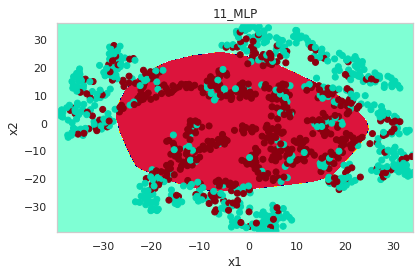

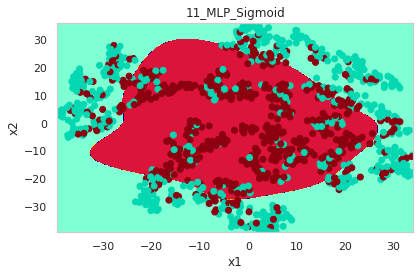

GB 11
roc_auc score for 11_MLP :  0.766 +/- 0.149
roc_auc score for 11_MLP_Sigmoid :  0.905 +/- 0.093
ttest: stat=-3.188, p-value (11_MLP_Sigmoid , 11_MLP)=0.011
wilcoxon: stat=0.000, p-value (11_MLP_Sigmoid , 11_MLP)=0.018




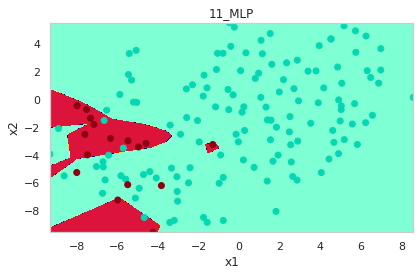

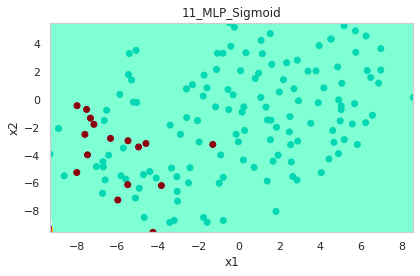

In [ ]:
pair(10, df_results)

# **Conclusão**

Identificamos que existem combinações onde facilmente conseguimos identificar um padrão de dados em que conseguíamos gerar a função GA e a função GB. Essa caracteristica era encontrada em combinações em que os dois modelos tem suposições muito fortes, como por exemplo a regressão logistica e o KNN. 

Houve também, o contraste entre os modelos que tem suposições fortes contra os modelos que generalizam bem. Nestes casos, mesmo criando conjuntos de dados que iam de encontro com as suposições de um modelo e em teoria tornando superior em desempenho, isto não acontencia pois ainda assim o outro modelo generaliza melhor. Por exemplo o SVM Radial e o SVM Linear.

Entre as dificuldades encontradas neste trabalho podemos pontuar as seguintes, tentamos seguir as características de cada um dos modelos conforme vistos em sala para encontrar conjuntos de dados que melhor se ajustem aos modelos. Porém, na grande maioria das vezes, isso não se mostrou tão trivial, então tivemos que pensar fora da caixa de forma a encontrar conjuntos de dados que atendessem as especificações do trabalho. 